# R Project Part 1 , BIOL-696, SDSU
## Geneva Porter, 13 March 2020 

In [1]:
# install.packages("picante", dependencies=TRUE)
library(picante)
load("R_biodiversity_workspace.RData")

# Workshop files have been placed in same directory as .inb file
# Remarks about each task are given at the end of each section.

Loading required package: ape
Loading required package: vegan
Loading required package: permute
Loading required package: lattice
This is vegan 2.5-6
Loading required package: nlme


In [2]:
# Community Data

comm <- read.csv("grassland_data/grassland.community.csv", 
                 header = TRUE, row.names = 1)
head(colnames(comm))
comm <- decostand(comm, method = "total")
apply(comm, 1, sum)

[1] "Antennaria_parvifolia"                  
[2] "Artemisia_cana"                         
[3] "Artemisia_frigida"                      
[4] "Symphyotrichum_ericoides_var._ericoides"
[5] "Bouteloua_gracilis"                     
[6] "Carex_filifolia"

mix-O-1  mix-O-2  mix-O-3  mix-O-4  mix-O-5  mix-O-6  mix-O-7  fes-K-8 
       1        1        1        1        1        1        1        1 
 fes-K-9 fes-K-10 fes-K-11 fes-K-12 fes-K-13 fes-K-14 fes-K-15 fes-K-16 
       1        1        1        1        1        1        1        1 
fes-K-17 mix-H-18 mix-H-19 mix-H-20 mix-H-21 mix-H-22 mix-H-23 mix-H-24 
       1        1        1        1        1        1        1        1 
mix-H-25 mix-H-26 mix-H-27 
       1        1        1

,SLA,LeafArea,LeafThickness,SLV,LeafTissueDens,SRL,SRV,RootTissueDens,RootDiam
Achillea_millefolium,140.2663,9.275390,0.4163333,59.56525,0.018085428,74.14570,5.038776,0.2553510,0.3123600
Allium_textile,137.7006,2.445361,0.9147222,125.69496,0.008137136,187.85485,14.013757,0.1049986,0.3107833
Amelanchier_alnifolia,156.1014,14.064856,0.2900000,45.45227,0.022841232,20.87560,2.518939,0.5039683,0.3760667
Androsace_occidentalis,257.2050,0.274745,0.2535000,84.22189,0.017706402,207.45582,3.291592,0.4071078,0.1148714
Antennaria_neglecta,171.0442,1.731990,0.2810000,48.14442,0.020920233,124.73397,6.710526,0.1593750,0.2749500
Antennaria_parvifolia,193.8718,0.317200,0.2466667,47.64151,0.021048340,44.93859,4.003997,0.2504167,0.3495500


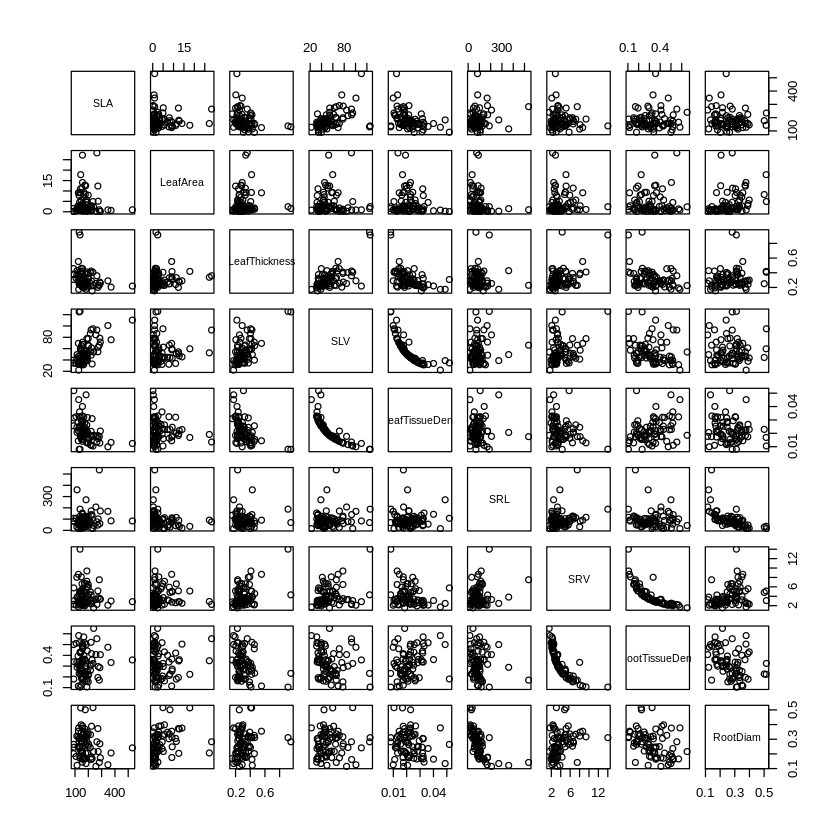

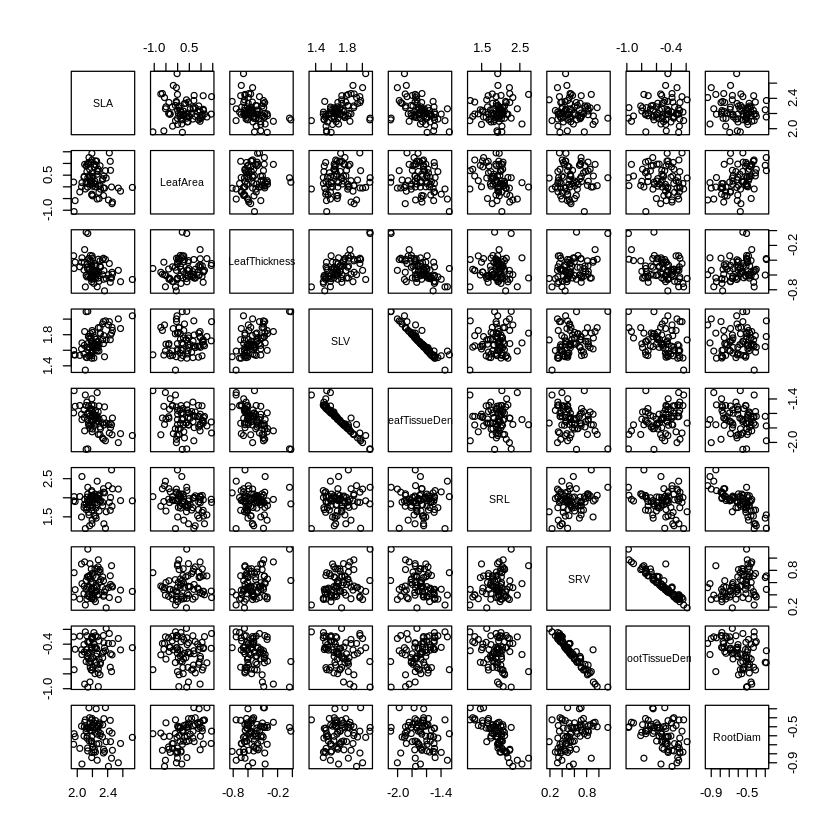

In [3]:
# Trait Data

traits <- read.csv("grassland_data/species.traits.csv", 
                   header = TRUE, row.names = 1)
head(traits)
pairs(traits)
traits <- log10(traits)
pairs(traits)

In [4]:
# Metadata

metadata <- read.csv("grassland_data/plot.metadata.csv", 
                     header = TRUE, row.names = 1)
head(metadata)

,habitat,site,slope,aspect,slope.position,rel.moisture
mix-O-1,Mixedgrass,Onefour,0,270,3.0,1
mix-O-2,Mixedgrass,Onefour,20,130,1.5,2
mix-O-3,Mixedgrass,Onefour,5,90,1.0,2
mix-O-4,Mixedgrass,Onefour,5,40,2.0,1
mix-O-5,Mixedgrass,Onefour,5,130,2.0,1
mix-O-6,Mixedgrass,Onefour,1,90,3.0,1


[1] "phylo"


Phylogenetic tree with 76 tips and 68 internal nodes.

Tip labels:
	Antennaria_neglecta, Antennaria_parvifolia, Erigeron_glabellus, Erigeron_pumilus, Heterotheca_villosa, Symphyotrichum_falcatum_var._falcatum, ...
Node labels:
	, , , , , , ...

Rooted; includes branch lengths.

[1] "edge"        "edge.length" "Nnode"       "node.label"  "tip.label"  
[6] "root.edge"

[1] "Antennaria_neglecta"   "Antennaria_parvifolia" "Erigeron_glabellus"   
[4] "Erigeron_pumilus"      "Heterotheca_villosa"

[1] 76

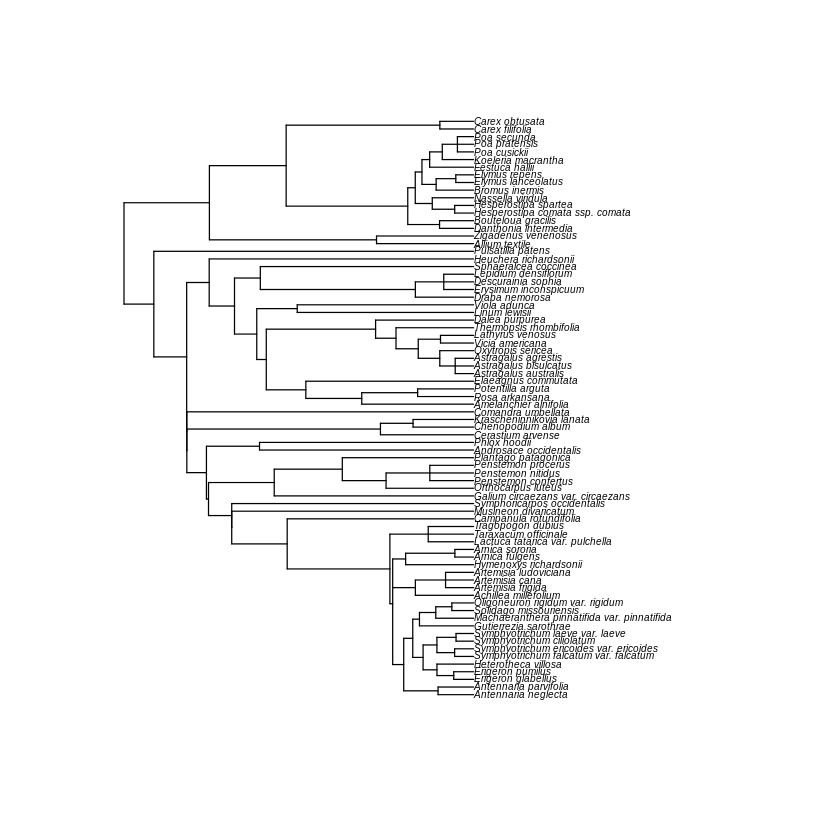

In [5]:
# Phylogeny

phy <- read.tree("grassland_data/grassland.phylogeny.newick")
class(phy)
phy

names(phy)
phy$tip.label[1:5]
Ntip(phy)
plot(phy, cex = 0.5)

In [6]:
# Cleaning and Matching Sets

ls()

[1] "combined"              "comm"                  "comm.bc.clust"        
 [4] "comm.bc.dist"          "comm.bc.mds"           "comm.mntd.dist"       
 [7] "comm.mntd.mds"         "comm.mntd.traits.dist" "comm.mntd.traits.mds" 
[10] "comm.pd"               "comm.sesmntd"          "comm.sesmpd"          
[13] "comm.sesmpd.traits"    "mds.fig"               "metadata"             
[16] "phy"                   "phy.dist"              "root.gls"             
[19] "root.pgls"             "trait.dist"            "traits"